### Carregando dados:

In [45]:
import pickle

# Carregando dados pelo pickle:

with open('critic_temp.pkl', 'rb') as f:
    crit_temp_array_train = pickle.load(f)
with open('thermal_cond.pkl', 'rb') as f:
    thermal_cond_array_train = pickle.load(f)

### Separando em train - test:

In [46]:
from sklearn.model_selection import train_test_split

crit_temp_array_train, crit_temp_array_test = train_test_split(crit_temp_array_train, test_size = 0.2, random_state=42)
thermal_cond_array_train, thermal_cond_array_test = train_test_split(thermal_cond_array_train, test_size=0.2, random_state=42)

### Criando modelo:

In [47]:
from sklearn.linear_model import LinearRegression
import numpy as np

modelo = LinearRegression()

thermal_cond_array_train = thermal_cond_array_train.reshape(-1, 1)

simples_reglin = modelo.fit(thermal_cond_array_train, crit_temp_array_train)


# Mostrando coeficientes da reta:
a = modelo.coef_[0]
b = modelo.intercept_

print(f"Equação da reta: y = {a:.4f}x + {b:.4f}")

# Mostrando Coeficiente de Pearson:
y_pred = modelo.predict(thermal_cond_array_train)
r = np.corrcoef(crit_temp_array_train, y_pred)[0, 1]

print(f"Coeficiente de correlação linear (r): {r:.4f}")

Equação da reta: y = 0.0359x + 1.5749
Coeficiente de correlação linear (r): 0.7525


### Plotando gráfico:

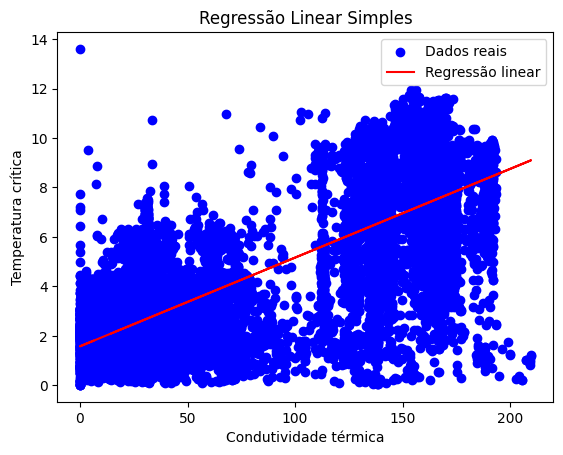

In [48]:
import matplotlib.pyplot as plt

# Previsão dos valores:
y_pred = modelo.predict(thermal_cond_array_train)

# Plotando os gráficos:
plt.scatter(thermal_cond_array_train, crit_temp_array_train, color='blue', label='Dados reais')
plt.plot(thermal_cond_array_train, y_pred, color='red', label='Regressão linear')
plt.xlabel('Condutividade térmica')
plt.ylabel('Temperatura crítica')
plt.title('Regressão Linear Simples')
plt.legend()
plt.show()

### Analisando Acurácia do modelo:

Equação da reta: y = 0.0359x + 1.5749
Coeficiente de correlação linear (r): 0.7546


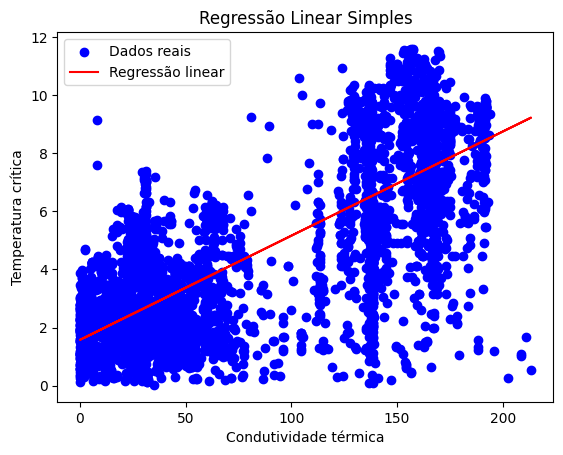

In [49]:
import matplotlib.pyplot as plt

# Previsão dos valores:
thermal_cond_array_test = thermal_cond_array_test.reshape(-1, 1)
y_pred = modelo.predict(thermal_cond_array_test)

# Mostrando coeficientes da reta:
a = modelo.coef_[0]
b = modelo.intercept_

print(f"Equação da reta: y = {a:.4f}x + {b:.4f}")

# Mostrando Coeficiente de Pearson:
r = np.corrcoef(crit_temp_array_test, y_pred)[0, 1]

print(f"Coeficiente de correlação linear (r): {r:.4f}")

# Plotando os gráficos:
plt.scatter(thermal_cond_array_test, crit_temp_array_test, color='blue', label='Dados reais')
plt.plot(thermal_cond_array_test, y_pred, color='red', label='Regressão linear')
plt.xlabel('Condutividade térmica')
plt.ylabel('Temperatura crítica')
plt.title('Regressão Linear Simples')
plt.legend()
plt.show()